In [1]:
""" Importing libraries """
from ovito.io import *
from ovito.modifiers import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" Defining hard-coded 'global' variables (?) """
qq = np.linspace(0.07,0.1,20)

In [3]:
""" Loading input file into an Ovito pipeline """
pipeline_wetting = import_file("wetting.dump")

In [4]:
""" Append modifiers to the pipeline (e.g. CNA, RDF, ...) """
pipeline_wetting.modifiers.append(CommonNeighborAnalysisModifier())
pipeline_wetting.modifiers.append(CoordinationAnalysisModifier(cutoff=10.0,partial=True))

In [5]:
""" Loop over simulation frames and do something """
for data in pipeline_wetting.frames:
    
    coord_liq = data.particles.positions[data.particles['v_dummymol'] == 1]
    coord_liq = coord_liq[...]

    xmean_liq = np.mean(coord_liq[:,0])
    ymean_liq = np.mean(coord_liq[:,1])

    x_liq_rel = coord_liq[:,0]-xmean_liq
    y_liq_rel = coord_liq[:,1]-ymean_liq
    r_liq_rel = np.sqrt((x_liq_rel**2)+(y_liq_rel**2))

    # Other stuff which I don't fully understand...
    
    rad_temp = 2*np.mean(r_liq_rel)*qq
    delta_3 = rad_temp/10
    # print(rad_temp)

    """ Example: average z coordinate of liquid and solid
        (can be used for sanity checks) """
    # zmean_liq = np.mean(coord_liq[:,2])
    # print('z_avg_liq = ',zmean_liq,' [A]')
    # coord_sub = data.particles.positions[data.particles['v_dummymol'] == 2]
    # coord_sub = coord_sub[...]
    # zmean_sub = np.mean(coord_sub[:,2])
    # print('z_avg_sub = ',zmean_sub,' [A]')
    
    """ Example: output fraction of BCC phase using Common Neighbor Analysis """
    # n_bcc = data.attributes['CommonNeighborAnalysis.counts.BCC']
    # print(n_bcc / data.particles.count)

In [6]:
""" Example: plot the Al-Al RDF of the last frame """
# rdf_table = pipeline_wetting.compute().tables['coordination-rdf']
# print('Combination of atom types: ',rdf_table.y.component_names)
# rdf_y = rdf_table.y[:,0]
# rdf_x = rdf_table.xy()[...][:,0]
# %matplotlib inline
# plt.plot(rdf_x,rdf_y)

' Example: plot the RDF of the last frame '

<IPython.core.display.Javascript object>


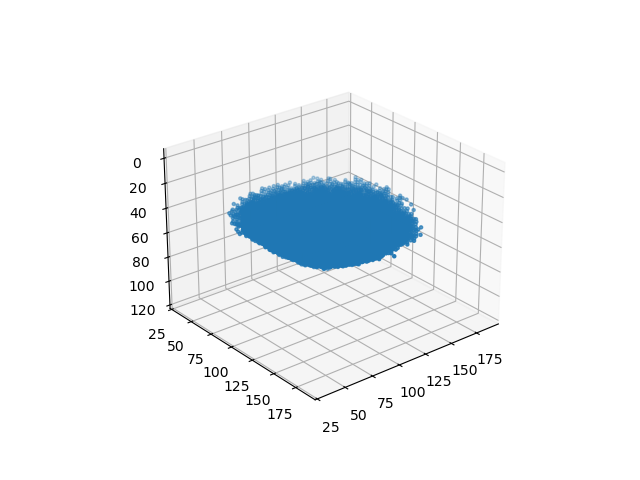

In [7]:
""" Example: 3D scatterplot of the last fame """
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.scatter(coord_sub[:,0],coord_sub[:,1],coord_sub[:,2],marker='.')
ax.scatter(coord_liq[:,0],coord_liq[:,1],coord_liq[:,2],marker='.')
plt.axis('equal')
plt.show()